# Visualization
1. (Line Plot) Historical Income Data
2. (Scatter Plot) Population and property count in SA2

In [2]:
import pandas as pd
import seaborn as sns
import geopandas as gdp
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

/opt/anaconda3/envs/ads/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


--------------
### Historical Income Data

In [3]:
income_df = pd.read_csv('../data/raw/income_for_suburb.csv')
income_df = income_df.drop(columns='Unnamed: 0')
income_df.head()

,LOC_NAME,2011-12.3,2012-13.3,2013-14.3,2014-15.3,2015-16.3,2016-17.3,2017-18.3,2018-19.3,2019,2020,2021,2022,2023,2024
0,Abbotsford,50034.0,50558.0,51419.0,53987.0,57501.0,58359.0,61476.0,64090.0,66409.949224,68813.876673,71304.822215,73885.935758,76560.481231,79331.840710
1,Aberfeldie,50458.0,52097.0,53037.0,54683.0,56381.0,56597.0,59116.0,61204.0,62920.085721,64684.288398,66497.957172,68362.479013,70279.279779,72249.825306
2,Aintree,38711.0,39709.0,40111.0,38717.0,39657.0,43924.0,48697.0,51869.0,54142.564367,56515.785463,58993.031525,61578.862259,64278.037238,67095.524658
3,Airport West,45090.0,46837.0,48941.0,50094.0,52329.0,53575.0,55912.0,58506.0,60726.452293,63031.176428,65423.370737,67906.354937,70483.574736,73158.606615
4,Albanvale,38444.0,40266.0,40038.0,41211.0,41238.0,41394.0,43026.0,44383.0,45311.439040,46259.299910,47226.988890,48214.920761,49223.518980,50253.215862


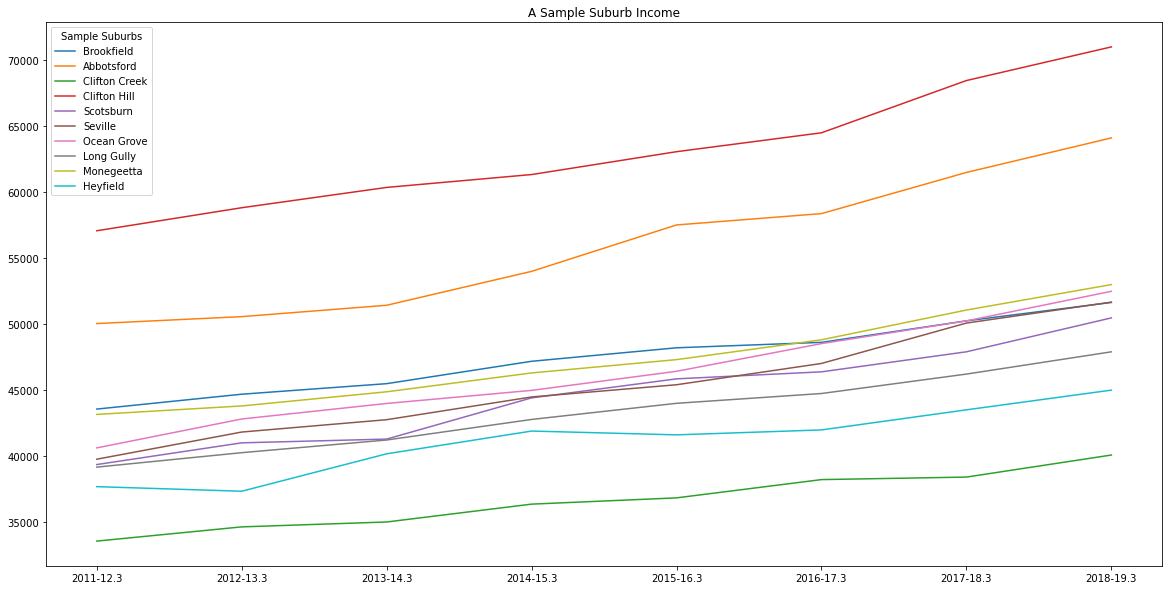

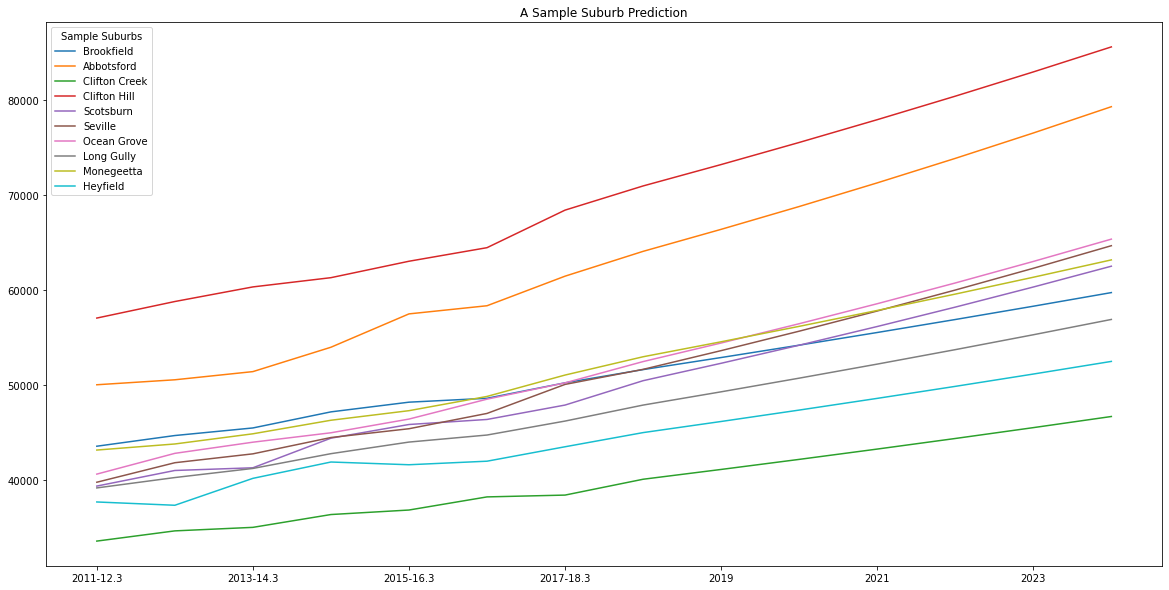

In [226]:
income_df_sample = income_df.sample(n=10, random_state=150)
income_df_sample = income_df_sample.set_index(keys='LOC_NAME', drop=True).transpose()
ax1 = income_df_sample.iloc[:8,:].plot(kind= 'line', title='A Sample Suburb Income', figsize=(20, 10)).legend(loc='upper left')
ax2 = income_df_sample.plot(kind= 'line', title='A Sample Suburb Prediction', figsize=(20, 10)).legend(loc='upper left')
ax1.set_title('Sample Suburbs')
ax2.set_title('Sample Suburbs')
ax1.get_figure().savefig("../plots/income_sample_1.jpeg")
ax2.get_figure().savefig("../plots/income_sample_2.jpeg")

------------
### Population and Preperty Count

In [213]:
property1 = pd.read_csv("../data/raw/properties_preporcessed_1.csv", index_col=[0])[['name', 'SA2_MAIN16']]
population_sa2 = pd.read_csv("../data/raw/external_data/population.csv", index_col=[0])
population_sa2 = population_sa2[['SA2 code', 'SA2 name', 'ERP 2021','density 2021 persons/km2']]
property_agg = property1.groupby('SA2_MAIN16', as_index=False).count().rename(columns={'SA2_MAIN16' : 'SA2 code', 'name' : 'property_count'})

In [214]:
pop_count = pd.merge(property_agg, population_sa2, on='SA2 code', how='left')
pop_count = pop_count[(np.abs(stats.zscore(pop_count['property_count'])) <2.5)]
pop_count = pop_count[(np.abs(stats.zscore(pop_count['ERP 2021'])) < 5)]

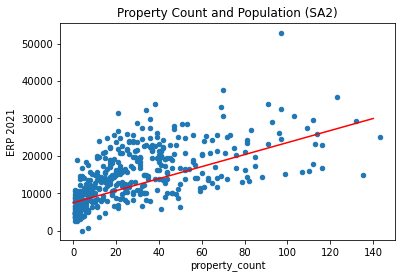

In [228]:
ax3 = pop_count.plot(kind='scatter', title='Property Count and Population (SA2)', y='ERP 2021', x='property_count')
ax3.add_line(line=plt.Line2D(xdata=[0, 140], ydata=[7500, 30000], color='red'))
ax3.get_figure().savefig("../plots/population_property_scatter.jpeg")

In [217]:
pop_count[['property_count', 'ERP 2021']].corr()

,property_count,ERP 2021
property_count,1.000000,0.606772
ERP 2021,0.606772,1.000000
